In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from termcolor import colored

In [79]:
Feature_Selection =['#Bytes', '#dp', '#packets', '#sp', 'Avg_bpp', 'Avg_bps',
       'Avg_pps', 'duration', 'first_dp', 'first_sp', 'min_d', 'p1_d',
       'p1_ip', 'p2_d', 'p2_ib', 'p2_ip', 'p3_d', 'p3_ib', 'p3_ip',
       'second_dp', 'second_sp', 'third_dp', 'third_sp']

# Data Load

In [26]:
data_A = pd.read_csv('data_identificada.csv').drop(['index','Name','Second_Protocol','Third_Protocol'],axis = 1)
data_B = pd.read_csv('data_no_identificada.csv').drop(['index','Name','Second_Protocol','Third_Protocol'], axis = 1)

In [86]:
data_A['#Bytes'].max()

261143006

In [92]:
data_A[data_A['Type'] == 'mine']['#Bytes'].max()

103398

# Data Inspection

### Inspección datos faltantes

In [30]:
avaliable_A = data_A.isnull().sum()
avaliable_A

Netflows             0
First_Protocol       0
p1_d                 0
p2_d                 0
p3_d                 0
duration             0
max_d                0
min_d                0
#packets             0
Avg_bps              0
Avg_pps              0
Avg_bpp              0
#Bytes               0
#sp                  0
#dp                  0
first_sp             0
second_sp           32
third_sp          2171
first_dp             0
second_dp           32
third_dp          2169
p1_ip                0
p2_ip                0
p3_ip                0
p1_ib                0
p2_ib                0
p3_ib                0
Type                 0
Cryptocurrency       0
dtype: int64

In [31]:
avaliable_B = data_B.isnull().sum()
avaliable_B

Netflows              0
First_Protocol        0
p1_d                  0
p2_d                  0
p3_d                  0
duration              0
max_d                 0
min_d                 0
#packets              0
Avg_bps               0
Avg_pps               0
Avg_bpp               0
#Bytes                0
#sp                   0
#dp                   0
first_sp              0
second_sp          7498
third_sp          10993
first_dp              0
second_dp          1708
third_dp           7103
p1_ip                 0
p2_ip                 0
p3_ip                 0
p1_ib                 0
p2_ib                 0
p3_ib                 0
Type                  0
Cryptocurrency        0
dtype: int64

In [38]:
porce_sec_sp = np.round(avaliable_A['second_sp'] / data_A.shape[0], 2) * 100
print(colored(f'El porcentaje de los datos faltantes de second_sp con respecto al número total de registros es de   {porce_sec_sp}%.', attrs=['bold']))

El porcentaje de los datos faltantes de second_sp con respecto al número total de registros es de   1.0%.


In [39]:
porce_sec_sp = np.round(avaliable_A['second_dp'] / data_A.shape[0], 2) * 100
print(colored(f'El porcentaje de los datos faltantes de second_sp con respecto al número total de registros es de   {porce_sec_sp}%.', attrs=['bold']))

El porcentaje de los datos faltantes de second_sp con respecto al número total de registros es de   1.0%.


In [42]:
porce_sec_sp = np.round(avaliable_B['second_sp'] / data_B.shape[0], 3) * 100
print(colored(f'El porcentaje de los datos faltantes de second_sp con respecto al número total de registros es de    {porce_sec_sp}%.', attrs=['bold']))

El porcentaje de los datos faltantes de second_sp con respecto al número total de registros es de    19.0%.


In [44]:
porce_sec_sp = np.round(avaliable_B['second_dp'] / data_B.shape[0], 3) * 100
print(colored(f'El porcentaje de los datos faltantes de second_sp con respecto al número total de registros es de   {porce_sec_sp}%.', attrs=['bold']))

El porcentaje de los datos faltantes de second_sp con respecto al número total de registros es de   4.3%.


### Variable Objetivo

[0 1]


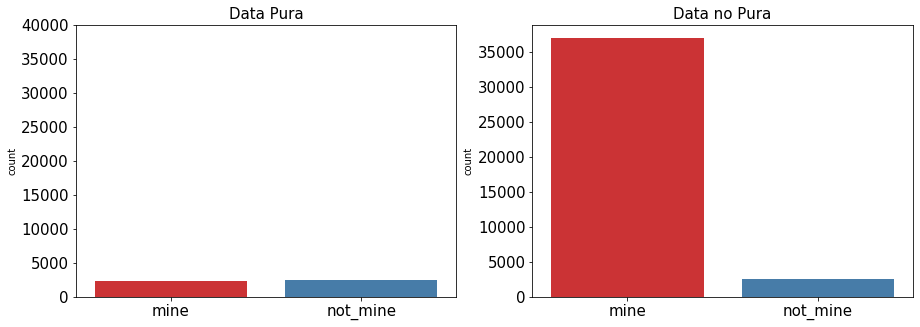

In [68]:
fig, ax = plt.subplots(nrows = 1, ncols=2, figsize = (15,5))
ax = ax.flat
sns.countplot(x='Type', data=data_A, palette="Set1",order = ['mine','not_mine'], ax = ax[0])
sns.countplot(x='Type', data=data_B, palette="Set1", ax = ax[1])
ax[0].set_title("Data Pura", size = 15)
ax[0].tick_params(labelsize = 15)
ax[0].set_xlabel("")
ax[0].set_yticks(ax[1].get_yticks())
ax[1].set_title("Data no Pura", size = 15)
ax[1].tick_params(labelsize = 15)
ax[1].set_xlabel("")

In [80]:
len(Feature_Selection)

23

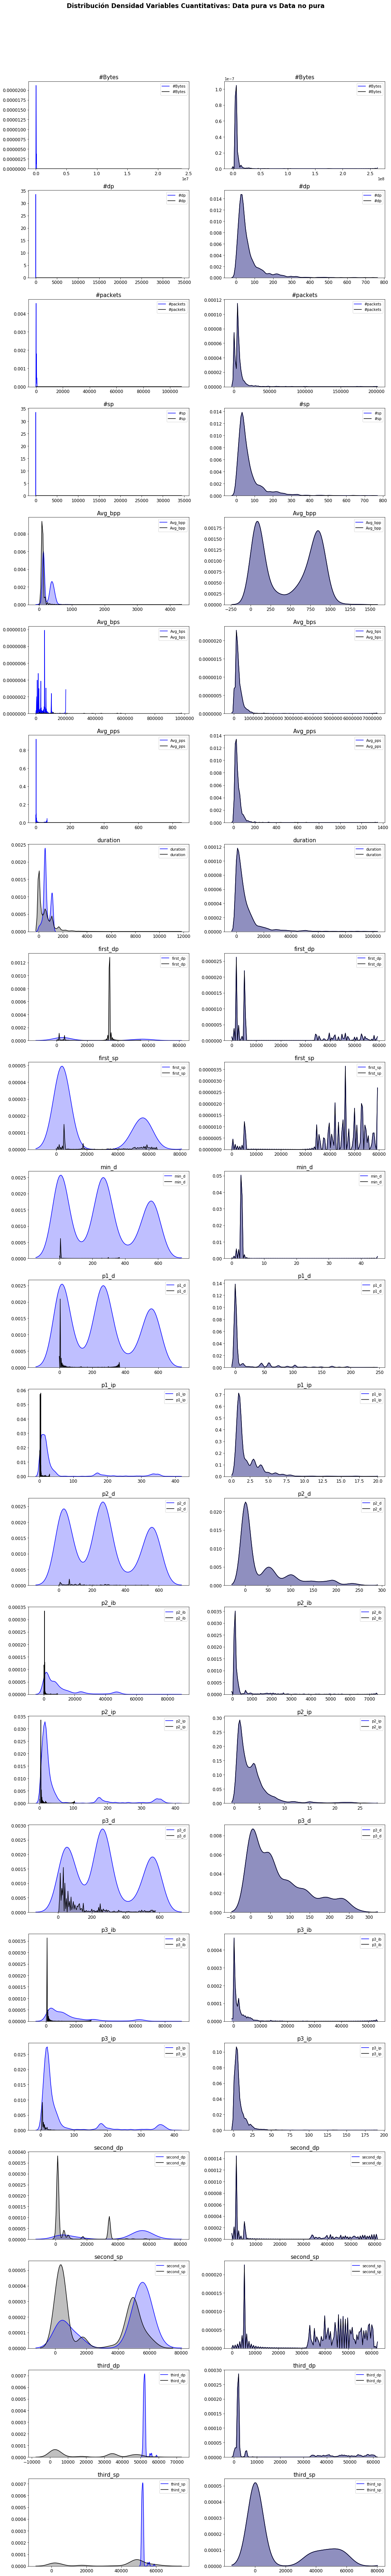

In [97]:
fig, ax = plt.subplots(nrows = 23, ncols = 2, figsize = (15,100))
ax = ax.flat
a = 0
b = 1
for i, col in enumerate(Feature_Selection[0:len(Feature_Selection)]):
    if i > 0: 
        a = a+1
        b = b+1
    sns.kdeplot(data_A[data_A['Type'] == 'mine'][col], color='blue', shade=True, ax = ax[i+a])
    sns.kdeplot(data_B[data_B['Type'] == 'mine'][col], color='black', shade=True, ax = ax[i+a])
    ax[i+a].set_title(col, size = 15)
    ax[i+a].tick_params(labelsize = 12)
    ax[i+a].set_xlabel("", size=9)
    ax[i+a].legend()
    
    sns.kdeplot(data_A[data_A['Type'] == 'not_mine'][col], color='blue', shade=True, ax = ax[i+b])
    sns.kdeplot(data_B[data_B['Type'] == 'not_mine'][col], color='black', shade=True, ax = ax[i+b])
    ax[i+b].set_title(col, size = 15)
    ax[i+b].tick_params(labelsize = 12)
    ax[i+b].set_xlabel("", size=9)
    ax[i+b].legend()
    

fig.tight_layout()
plt.subplots_adjust(top = 0.95)
fig.suptitle('Distribución Densidad Variables Cuantitativas: Data pura vs Data no pura', fontsize = 17, fontweight = "bold");


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

ValueError: cannot convert float NaN to integer

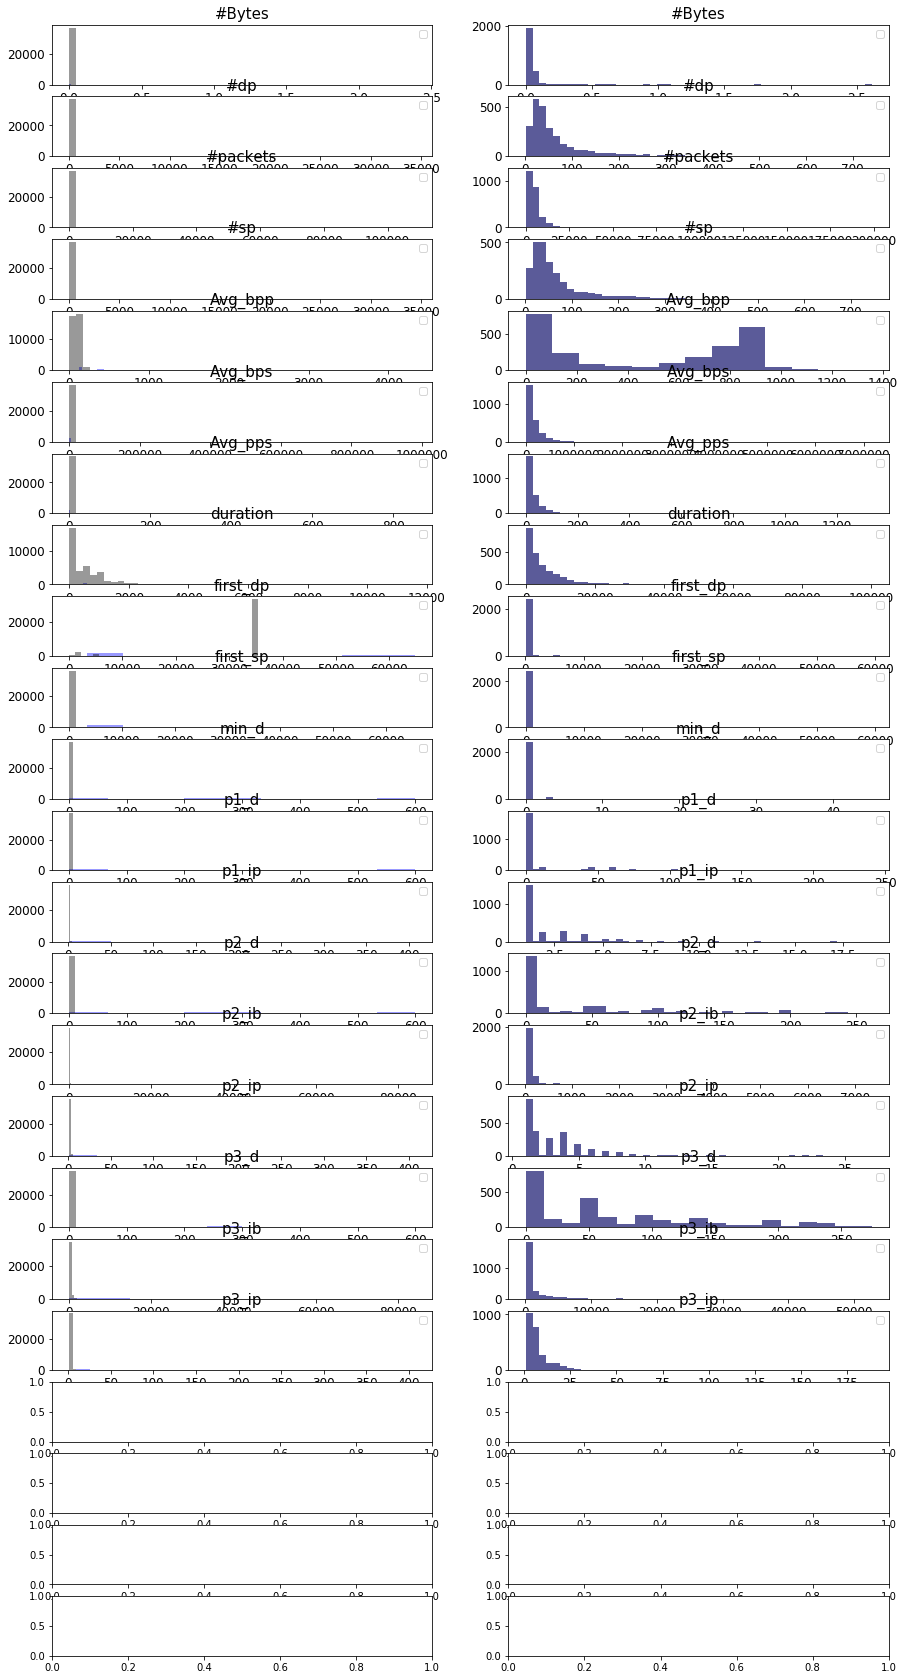

In [100]:
fig, ax = plt.subplots(nrows = 23, ncols = 2, figsize = (15,30))
ax = ax.flat
a = 0
b = 1
for i, col in enumerate(Feature_Selection[0:len(Feature_Selection)-1]):
    if i > 0: 
        a = a+1
        b = b+1
        
    sns.distplot(data_A[data_A['Type'] == 'mine'][col], color='blue', kde=False, ax = ax[i+a])
    sns.distplot(data_B[data_B['Type'] == 'mine'][col], color='black', kde=False, ax = ax[i+a])
    
    ax[i+a].set_title(col, size = 15)
    ax[i+a].tick_params(labelsize = 12)
    ax[i+a].set_xlabel("", size=9)
    ax[i+a].legend()
    
    sns.distplot(data_A[data_A['Type'] == 'not_mine'][col], color='blue', kde=False, ax = ax[i+b])
    sns.distplot(data_B[data_B['Type'] == 'not_mine'][col], color='black', kde=False, ax = ax[i+b])
    
    ax[i+b].set_title(col, size = 15)
    ax[i+b].tick_params(labelsize = 12)
    ax[i+b].set_xlabel("", size=9)
    ax[i+b].legend()
    

fig.tight_layout()
plt.subplots_adjust(top = 0.95)
fig.suptitle('Histogramas Variables Cuantitativas: Data pura vs Data no pura', fontsize = 17, fontweight = "bold");


In [63]:
sns.scatterplot(x="first_sp", y=data_A, data=data_A)

ValueError: could not broadcast input array from shape (4733) into shape (10)